<a href="https://colab.research.google.com/github/devsharmapolist/DATA-SCIENCE-COURSE-PW/blob/main/KNN_and_PCA_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21. Train a KNN Classifier on the Iris dataset and print model accuracy

In [1]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("KNN Classifier Accuracy on Iris Dataset:", accuracy)


KNN Classifier Accuracy on Iris Dataset: 1.0


22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

In [2]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using MSE

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Create synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("KNN Regressor Mean Squared Error:", mse)


KNN Regressor Mean Squared Error: 1521.7819029301886


23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

In [3]:
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with Euclidean distance (default)
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

print("Accuracy with Euclidean Distance:", acc_euclidean)
print("Accuracy with Manhattan Distance:", acc_manhattan)


Accuracy with Euclidean Distance: 1.0
Accuracy with Manhattan Distance: 1.0


24. Train a KNN Classifier with different values of K and visualize decision boundaries

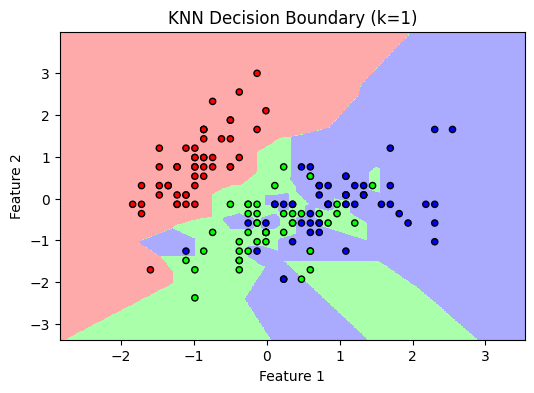

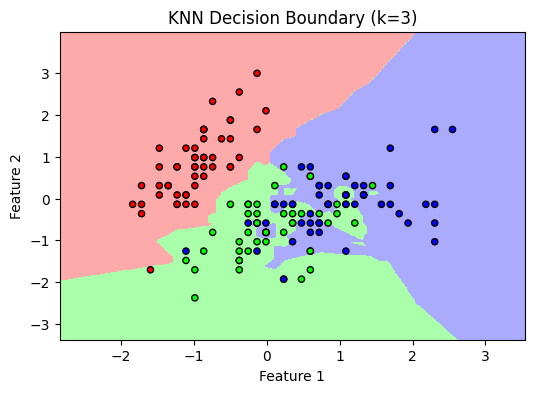

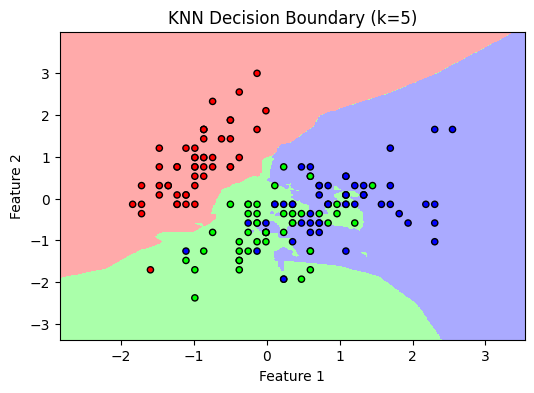

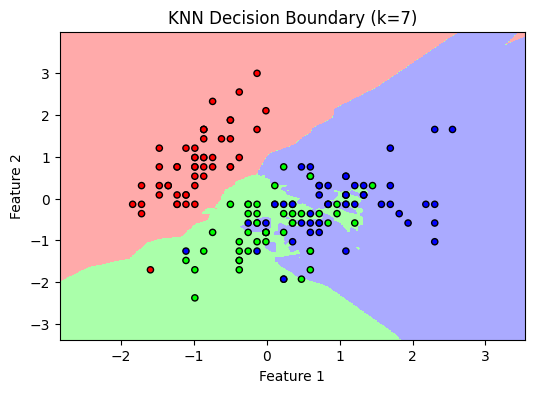

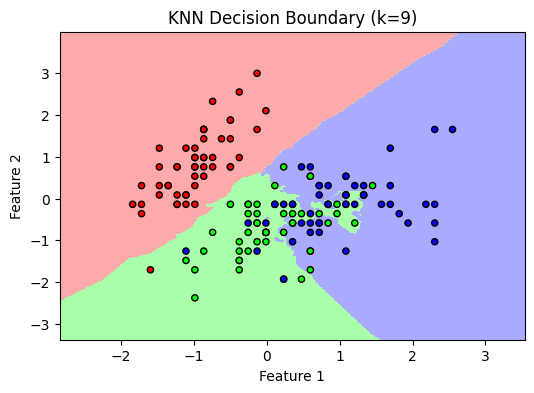

In [4]:
# 24. Train a KNN Classifier with different values of K and visualize decision boundaries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Only first two features for 2D plotting
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

# Plot decision boundaries
def plot_decision_boundaries(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)

    x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
    y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Try for different values of K
for k in [1, 3, 5, 7, 9]:
    plot_decision_boundaries(k)


25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [5]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without Feature Scaling:", acc_unscaled)
print("Accuracy with Feature Scaling:", acc_scaled)


Accuracy without Feature Scaling: 1.0
Accuracy with Feature Scaling: 1.0


26. Train a PCA model on synthetic data and print the explained variance ratio for each component

In [6]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic data
X, y = make_classification(n_samples=300, n_features=10, n_informative=5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained Variance Ratio for Each Component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i + 1}: {ratio:.4f}")


Explained Variance Ratio for Each Component:
Component 1: 0.2613
Component 2: 0.1818
Component 3: 0.1447
Component 4: 0.1013
Component 5: 0.0970
Component 6: 0.0917
Component 7: 0.0724
Component 8: 0.0499
Component 9: 0.0000
Component 10: 0.0000


27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [7]:
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN without PCA
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_no_pca = knn.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA:", acc_pca)


Accuracy without PCA: 1.0
Accuracy with PCA: 0.9333333333333333


28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [8]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 11)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Grid Search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best model
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", acc)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 8}
Best Accuracy: 1.0


29. Train a KNN Classifier and check the number of misclassified samples

In [9]:
# 29. Train a KNN Classifier and check the number of misclassified samples

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred = knn.predict(X_test_scaled)

# Calculate misclassified samples
misclassified_count = (y_test != y_pred).sum()

print("Number of Misclassified Samples:", misclassified_count)


Number of Misclassified Samples: 0


30. Train a PCA model and visualize the cumulative explained variance

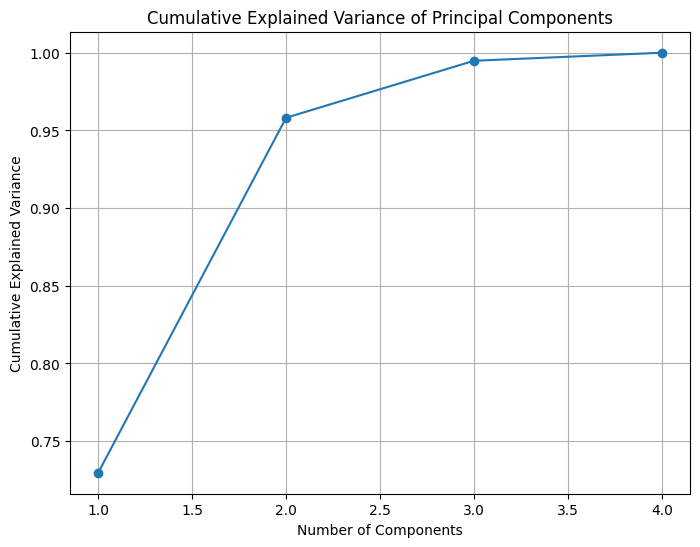

Cumulative Explained Variance: [0.72962445 0.95813207 0.99482129 1.        ]


In [10]:
# 30. Train a PCA model and visualize the cumulative explained variance

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance of Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

print("Cumulative Explained Variance:", cumulative_variance)


31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

In [11]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train_scaled, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test_scaled))

# KNN with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train_scaled, y_train)
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test_scaled))

print("Accuracy with uniform weights:", acc_uniform)
print("Accuracy with distance weights:", acc_distance)


Accuracy with uniform weights: 1.0
Accuracy with distance weights: 1.0


32. Train a KNN Regressor and analyze the effect of different K values on performance

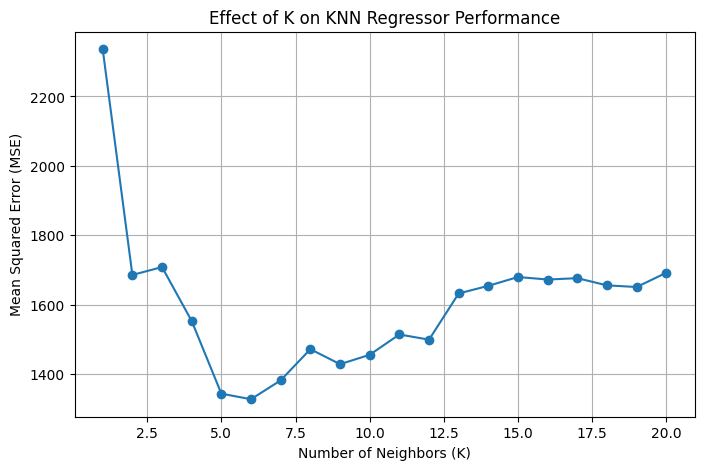

In [12]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create synthetic regression data
X, y = make_regression(n_samples=300, n_features=5, noise=15, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different K values
k_values = range(1, 21)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot MSE vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.title("Effect of K on KNN Regressor Performance")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


33. Implement KNN Imputation for handling missing values in a dataset

In [13]:
# 33. Implement KNN Imputation for handling missing values in a dataset

import numpy as np
from sklearn.impute import KNNImputer
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris data and introduce some missing values
iris = load_iris()
X = iris.data.copy()
y = iris.target

# Introduce missing values randomly
rng = np.random.default_rng(42)
missing_mask = rng.random(X.shape) < 0.1
X[missing_mask] = np.nan

# Convert to DataFrame for better visualization
df_with_missing = pd.DataFrame(X, columns=iris.feature_names)

print("Data with Missing Values (First 5 Rows):")
print(df_with_missing.head())

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X)

# Convert imputed data to DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=iris.feature_names)

print("\nData After KNN Imputation (First 5 Rows):")
print(df_imputed.head())


Data with Missing Values (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                NaN               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               NaN                1.4               0.2

Data After KNN Imputation (First 5 Rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.100000          3.500000                1.4               0.2
1           4.733333          3.000000                1.4               0.2
2           4.700000          3.200000                1.3               0.2
3           4.600000          3.100000                1.5               0.2
4           5.000000          3.233333                1.4               0.2


34. Train a PCA model and visualize the data projection onto the first two principal components

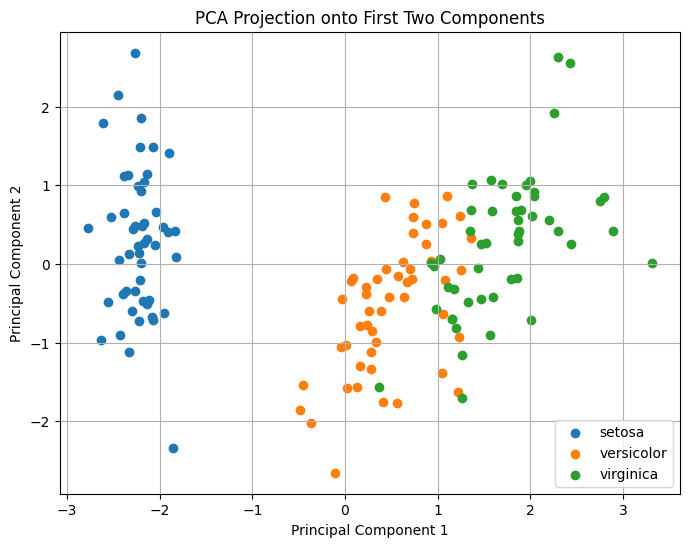

In [14]:
# 34. Train a PCA model and visualize the data projection onto the first two principal components

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot projection
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection onto First Two Components")
plt.legend()
plt.grid(True)
plt.show()


35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [15]:
# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KD Tree
knn_kd = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=5)
start_kd = time.time()
knn_kd.fit(X_train_scaled, y_train)
acc_kd = accuracy_score(y_test, knn_kd.predict(X_test_scaled))
time_kd = time.time() - start_kd

# Ball Tree
knn_ball = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=5)
start_ball = time.time()
knn_ball.fit(X_train_scaled, y_train)
acc_ball = accuracy_score(y_test, knn_ball.predict(X_test_scaled))
time_ball = time.time() - start_ball

# Results
print("KD Tree Accuracy:", acc_kd, "Time:", round(time_kd, 5), "seconds")
print("Ball Tree Accuracy:", acc_ball, "Time:", round(time_ball, 5), "seconds")


KD Tree Accuracy: 1.0 Time: 0.01553 seconds
Ball Tree Accuracy: 1.0 Time: 0.01592 seconds


36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

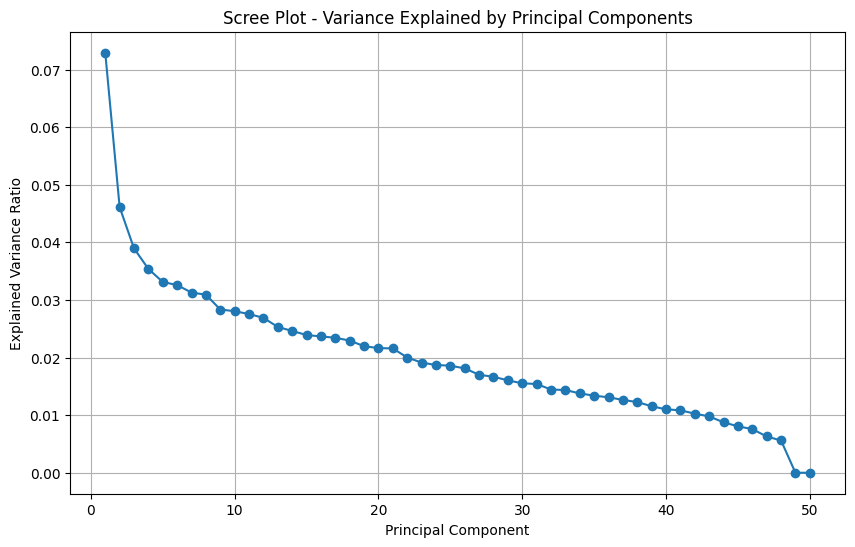

In [16]:
# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate a high-dimensional dataset (50 features)
X, y = make_classification(n_samples=300, n_features=50, n_informative=10, random_state=42)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot - Variance Explained by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [17]:
# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluate performance
print("Classification Report (Precision, Recall, F1-Score):\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report (Precision, Recall, F1-Score):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



38. Train a PCA model and analyze the effect of different numbers of components on accuracy

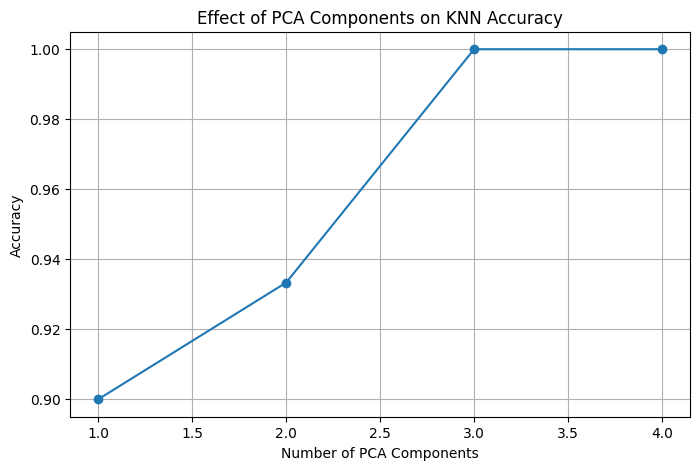

In [18]:
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different numbers of PCA components
components = [1, 2, 3, 4]
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs number of components
plt.figure(figsize=(8, 5))
plt.plot(components, accuracies, marker='o')
plt.title("Effect of PCA Components on KNN Accuracy")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


39. Train a KNN Classifier with different leaf_size values and compare accuracy

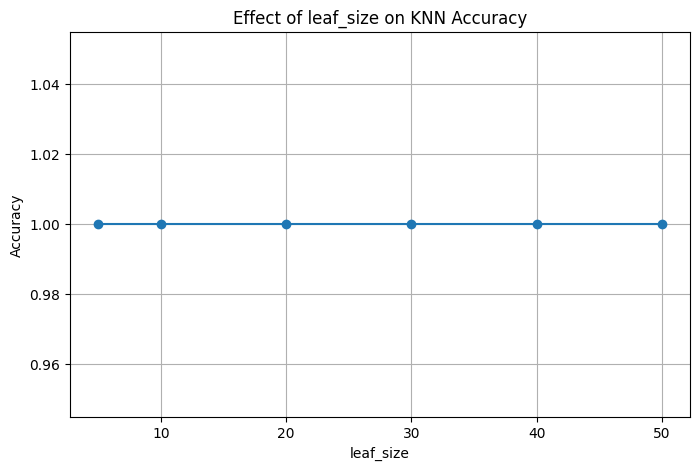

In [19]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different leaf_size values
leaf_sizes = [5, 10, 20, 30, 40, 50]
accuracies = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot leaf_size vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o')
plt.title("Effect of leaf_size on KNN Accuracy")
plt.xlabel("leaf_size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


40. Train a PCA model and visualize how data points are transformed before and after PCA

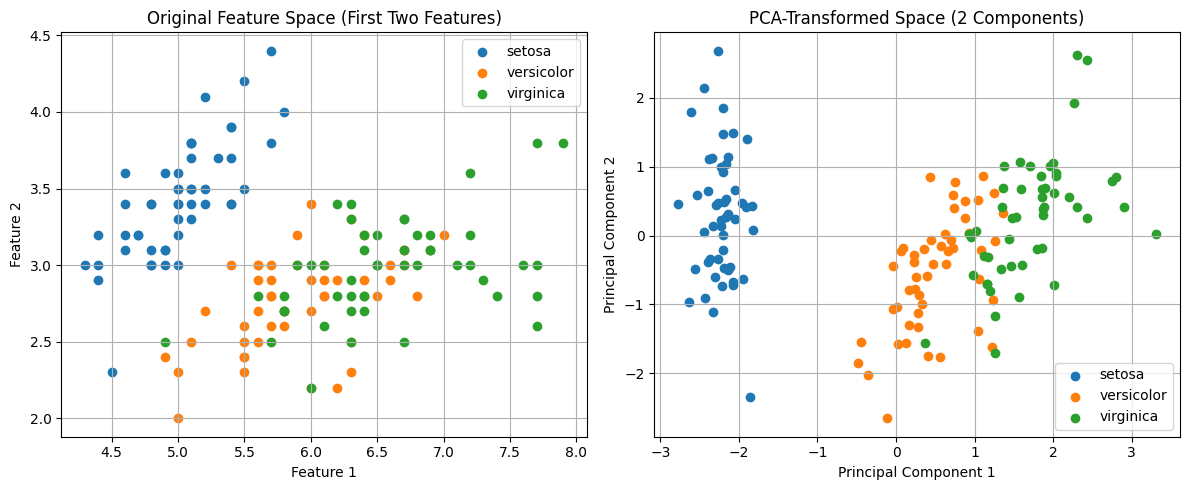

In [20]:
# 40. Train a PCA model and visualize how data points are transformed before and after PCA

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot original feature space (first two features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)
plt.title("Original Feature Space (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

# Plot PCA-transformed space
plt.subplot(1, 2, 2)
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.title("PCA-Transformed Space (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

In [21]:
# 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

In [22]:
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=300, n_features=5, noise=0.1, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor with Euclidean distance
knn_euclid = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclid.fit(X_train_scaled, y_train)
y_pred_euclid = knn_euclid.predict(X_test_scaled)
mse_euclid = mean_squared_error(y_test, y_pred_euclid)

# Train KNN Regressor with Manhattan distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Print mean squared errors
print(f"Mean Squared Error (Euclidean): {mse_euclid:.4f}")
print(f"Mean Squared Error (Manhattan): {mse_manhattan:.4f}")


Mean Squared Error (Euclidean): 1083.8171
Mean Squared Error (Manhattan): 1104.5220


43. Train a KNN Classifier and evaluate using ROC-AUC score

In [23]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Binarize the output for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = knn.predict_proba(X_test_scaled)

# Calculate ROC-AUC score for each class
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')

# Print ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 1.0000


44. Train a PCA model and visualize the variance captured by each principal component

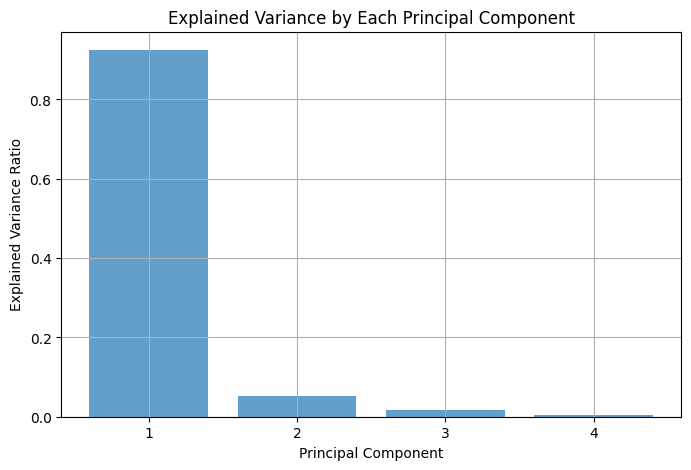

In [24]:
# 44. Train a PCA model and visualize the variance captured by each principal component

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA
pca = PCA()
pca.fit(X)

# Visualize the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.title("Explained Variance by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()


45. Train a KNN Classifier and perform feature selection before training

In [30]:
# Alternative Approach: Train a KNN Classifier and perform feature selection before training using SelectKBest

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)  # Selecting top 3 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train KNN Classifier on selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



46. Train a PCA model and visualize the data projection onto the first two principal components

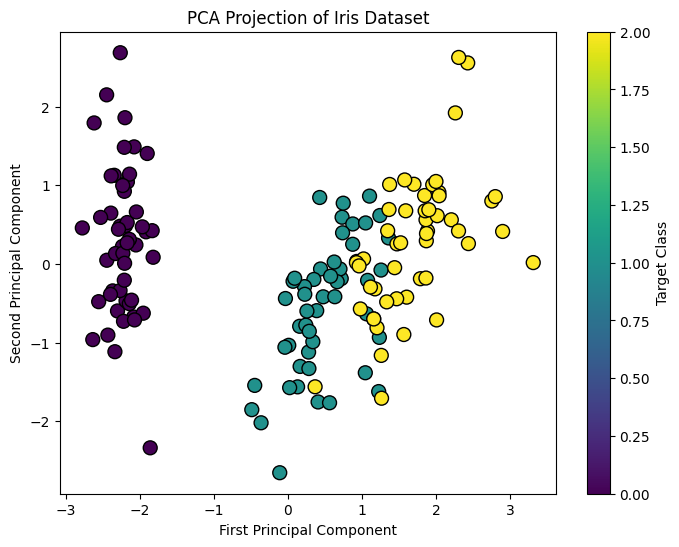

In [31]:
# 46. Train a PCA model and visualize the data projection onto the first two principal components

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data projection onto the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Target Class')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection of Iris Dataset')
plt.show()


47. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [32]:
# 47. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KDTree, BallTree

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with KD Tree
knn_kd_tree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kd_tree.fit(X_train_scaled, y_train)
y_pred_kd_tree = knn_kd_tree.predict(X_test_scaled)

# Train KNN with Ball Tree
knn_ball_tree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_ball_tree.fit(X_train_scaled, y_train)
y_pred_ball_tree = knn_ball_tree.predict(X_test_scaled)

# Print classification report for both models
print("Classification Report for KD Tree:")
print(classification_report(y_test, y_pred_kd_tree))

print("\nClassification Report for Ball Tree:")
print(classification_report(y_test, y_pred_ball_tree))


Classification Report for KD Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report for Ball Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



48. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

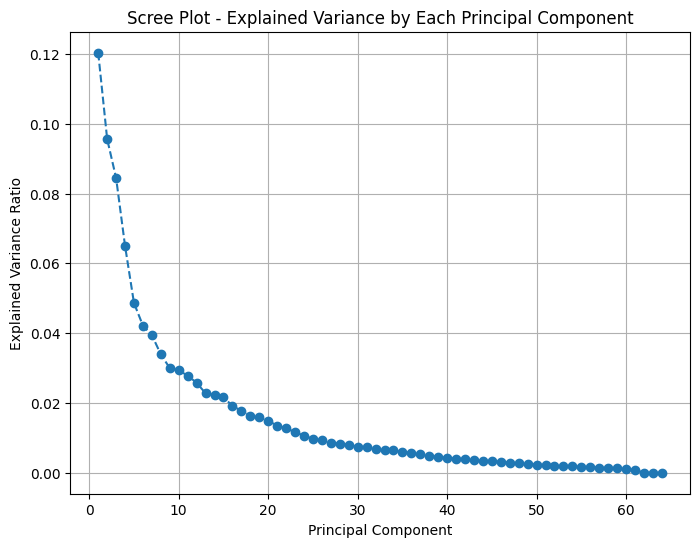

In [33]:
# 48. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load Digits dataset (8x8 images, so it's high-dimensional)
digits = load_digits()
X = digits.data
y = digits.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=64)  # We have 64 features in the Digits dataset
X_pca = pca.fit_transform(X_scaled)

# Scree plot: Explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 65), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot - Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()
